In [1]:
#ABIY
# Import necessary libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline
import numpy as np
import pandas as pd
import hvplot.pandas
import os
import json
import requests
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
import sqlalchemy as sql

In [2]:
# Load .env environment variables
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [3]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [4]:
# Format current date as ISO format
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-05", tz="America/New_York").isoformat()

In [5]:
#Client Portfolio 
# Set the tickers
tickers = ["GOOG","CMG","IBM", "XLB"]

 

In [6]:
#Diversifying portfolio
tickers_2= ["GOOG","CMG","IBM", "XLB","SPY","AGG"]

In [7]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"
data_set= (tickers, timeframe, start_date, end_date)
data_set= (tickers_2, timeframe, start_date, end_date)

In [8]:
# Set the number of years of data to fetch
num_years = 20

lim = 1000
num_days_data_needed = num_years * 252
def format_date_iso(date):
    return pd.Timestamp(date, tz="America/New_York").isoformat()

        
# Get current closing prices of portfolio
client_prices_df = pd.DataFrame()
prices_df = pd.DataFrame()
client_prices_df = alpaca.get_barset(tickers,timeframe,start = start_date,end = end_date,limit=lim).df
prices_df = alpaca.get_barset(tickers_2,timeframe,start = start_date,end = end_date,limit=lim).df

#get the portfolio closing price
#portfolio_closing_prices_df["AGG"] = portfolio_df["AGG"]["close"]
#concanating portfolio closing price
#closing_price_client_df = pd.concat([cmg_price, goog_price,ibm_price, xlb_price],axis=1)
#closing_price_portfolio_df = pd.concat([cmg_price, goog_price,ibm_price, xlb_price,agg_price,spy_price], axis =1)
#creating portfolio daily returns dataframe
client_portfolio_dialy_returns=pd.DataFrame()
portfolio_daily_returns=pd.DataFrame()
# Create an empty `closing_prices_df` DataFrame using Pandas
closing_prices_df = pd.DataFrame()
#get portfolio daily returns
#client_portfolio_daily_returns=closing_prices_df.pct_change().dropna()                                        
#portfolio_daily_returns=closing_prices_df.pct_change().dropna()
#creating Portfolio cumulative returns dataframe\
client_portfolio_cumulative_returns=pd.DataFrame()                                       
portfolio_cumulative_returns=pd.DataFrame()
#Analyzing portfolio cumulative returns
client_portfolio_cumulative_returns=(1 + portfolio_daily_returns).cumprod()-1                                        
portfolio_cumulative_returns=(1 + portfolio_daily_returns).cumprod()-1

# Display sample data
client_prices_df.sort_index(inplace=True)
display(client_prices_df.head())
display(prices_df.head())

CMG                                       GOOG  \
                             open      high     low   close  volume     open   
time                                                                           
2019-05-01 00:00:00-04:00  688.86  697.3300  685.40  688.41  377159  1188.05   
2019-05-02 00:00:00-04:00  687.40  708.8585  686.15  707.93  585736  1167.76   
2019-05-03 00:00:00-04:00  707.57  710.9321  703.42  709.21  408668  1173.65   
2019-05-06 00:00:00-04:00  703.23  720.0000  702.90  716.68  448007  1166.26   
2019-05-07 00:00:00-04:00  716.63  721.4200  702.10  706.37  396476  1180.47   

                                                                      IBM  \
                                high        low    close   volume    open   
time                                                                        
2019-05-01 00:00:00-04:00  1188.0500  1167.1800  1167.92  2458890  140.55   
2019-05-02 00:00:00-04:00  1174.1895  1155.0018  1162.48  1795505  140.50   
2019-05-03 00:00:00-04:00  1186.8000  1169.0000  1185.56  1768455  139.70   
2019-05-06 00:00:00-04:00  1190.8500  1166.2600  1189.51  1428613  138.30   
2019-05-07 00:00:00-04:00  1190.4400  1161.0400  1174.62  1346224  139.15   

                                                              XLB         \
                             high     low   close   volume   open   high   
time                                                                       
2019-05-01 00:00:00-04:00  141.81  140.17  140.57  2599918  57.53  57.53   
2019-05-02 00:00:00-04:00  141.28  139.41  139.64  2729143  56.14  56.44   
2019-05-03 00:00:00-04:00  141.00  139.63  140.28  1967352  56.23  56.70   
2019-05-06 00:00:00-04:00  140.69  137.90  140.40  2198347  55.32  56.08   
2019-05-07 00:00:00-04:00  139.51  136.19  137.62  4056178  55.33  55.43   

                                                    
                              low  close    volume  
time                                                
2019-05-01 00:00:00-04:00  56.400  56.41   6452315  
2019-05-02 00:00:00-04:00  55.725  56.11  10500422  
2019-05-03 00:00:00-04:00  56.180  56.67   5918612  
2019-05-06 00:00:00-04:00  55.320  55.88  15531266  
2019-05-07 00:00:00-04:00  54.590  54.89   7603725

AGG                                       \
                             open    high      low    close     volume   
time                                                                     
2019-05-01 00:00:00-04:00  108.47  108.76  108.320  108.390  4426906.0   
2019-05-02 00:00:00-04:00  108.33  108.33  108.100  108.165  2230918.0   
2019-05-03 00:00:00-04:00  108.32  108.42  108.275  108.350  2179061.0   
2019-05-06 00:00:00-04:00  108.56  108.57  108.440  108.460  4495020.0   
2019-05-07 00:00:00-04:00  108.63  108.70  108.585  108.620  2788574.0   

                              CMG                                    ...  \
                             open      high     low   close  volume  ...   
time                                                                 ...   
2019-05-01 00:00:00-04:00  688.86  697.3300  685.40  688.41  377159  ...   
2019-05-02 00:00:00-04:00  687.40  708.8585  686.15  707.93  585736  ...   
2019-05-03 00:00:00-04:00  707.57  710.9321  703.42  709.21  408668  ...   
2019-05-06 00:00:00-04:00  703.23  720.0000  702.90  716.68  448007  ...   
2019-05-07 00:00:00-04:00  716.63  721.4200  702.10  706.37  396476  ...   

                              SPY                                       XLB  \
                             open    high     low   close     volume   open   
time                                                                          
2019-05-01 00:00:00-04:00  294.72  294.95  291.80  291.84   59432706  57.53   
2019-05-02 00:00:00-04:00  291.68  292.70  289.52  291.27   59209780  56.14   
2019-05-03 00:00:00-04:00  292.82  294.34  292.56  294.02   45416907  56.23   
2019-05-06 00:00:00-04:00  289.25  293.31  288.90  292.87   75426654  55.32   
2019-05-07 00:00:00-04:00  290.15  290.81  285.81  288.04  118960368  55.33   

                                                           
                            high     low  close    volume  
time                                                       
2019-05-01 00:00:00-04:00  57.53  56.400  56.41   6452315  
2019-05-02 00:00:00-04:00  56.44  55.725  56.11  10500422  
2019-05-03 00:00:00-04:00  56.70  56.180  56.67   5918612  
2019-05-06 00:00:00-04:00  56.08  55.320  55.88  15531266  
2019-05-07 00:00:00-04:00  55.43  54.590  54.89   7603725  

[5 rows x 30 columns]

In [9]:
#creating an empty for holding the closing prices
client_closing_prices_df = pd.DataFrame()
#usinga for loop, for every tickers list,
#select the close price for each tickers in prices_df for the same ticker value
#That will be equal to closing_prices_df
for ticker in tickers:
    client_closing_prices_df[ticker]= client_prices_df[ticker]['close']
#For the new closing_prices_df DataFrame ,keep only data component
#creating an empty for holding the closing prices
closing_prices_df = pd.DataFrame()
#usinga for loop, for every tickers list,
#select the close price for each tickers in prices_df for the same ticker value
#That will be equal to closing_prices_df
for ticker in tickers_2:
    closing_prices_df[ticker]= prices_df[ticker]['close']
#For the new closing_prices_df DataFrame ,keep only data component
#closing_prices_df.set.index = closing_prices_df.index.date
#display the first 5 rows
display(client_closing_prices_df.head())

#closing_prices_df.set.index = closing_prices_df.index.date
#display the first 5 rows
display(closing_prices_df.head())

GOOG     CMG     IBM    XLB
time                                                     
2019-05-01 00:00:00-04:00  1167.92  688.41  140.57  56.41
2019-05-02 00:00:00-04:00  1162.48  707.93  139.64  56.11
2019-05-03 00:00:00-04:00  1185.56  709.21  140.28  56.67
2019-05-06 00:00:00-04:00  1189.51  716.68  140.40  55.88
2019-05-07 00:00:00-04:00  1174.62  706.37  137.62  54.89

GOOG     CMG     IBM    XLB     SPY      AGG
time                                                                      
2019-05-01 00:00:00-04:00  1167.92  688.41  140.57  56.41  291.84  108.390
2019-05-02 00:00:00-04:00  1162.48  707.93  139.64  56.11  291.27  108.165
2019-05-03 00:00:00-04:00  1185.56  709.21  140.28  56.67  294.02  108.350
2019-05-06 00:00:00-04:00  1189.51  716.68  140.40  55.88  292.87  108.460
2019-05-07 00:00:00-04:00  1174.62  706.37  137.62  54.89  288.04  108.620

<AxesSubplot:title={'center':'Closing Prices of Client portfolio with diversifying stocks'}, xlabel='time'>

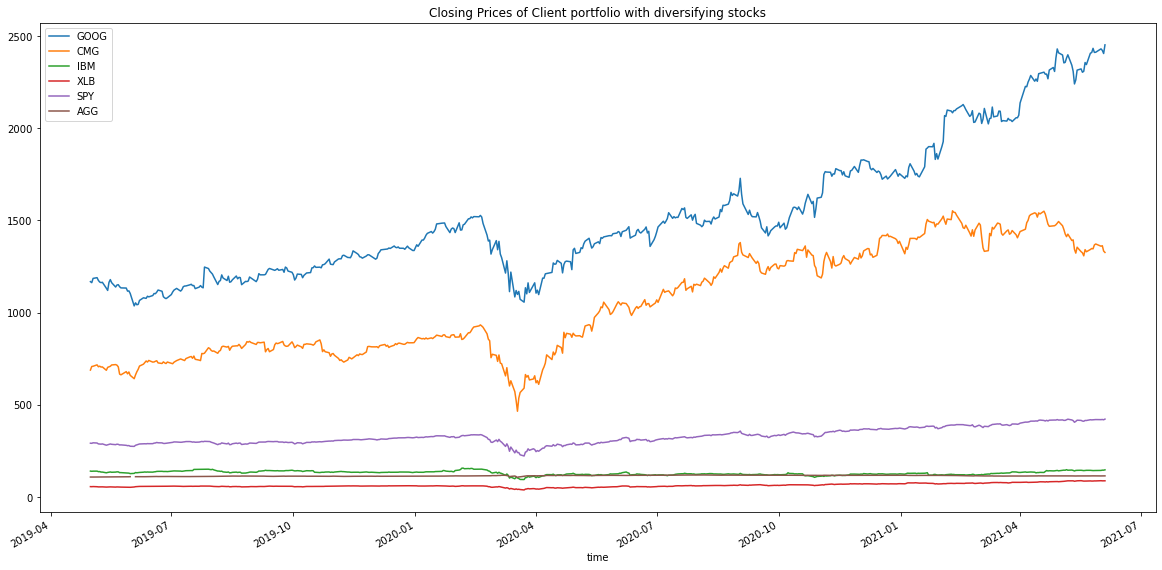

In [10]:
#visualizing the closing_prices_df using plot
closing_prices_df.plot(figsize=(20,10),title='Closing Prices of Client portfolio with diversifying stocks')

In [11]:
# Compute the `client_daily_returns_df` DataFrame by chaining
# the pct_change function with the dropna function.
client_daily_returns= client_closing_prices_df.pct_change().dropna()
client_daily_returns.head()

GOOG       CMG       IBM       XLB
time                                                             
2019-05-02 00:00:00-04:00 -0.004658  0.028355 -0.006616 -0.005318
2019-05-03 00:00:00-04:00  0.019854  0.001808  0.004583  0.009980
2019-05-06 00:00:00-04:00  0.003332  0.010533  0.000855 -0.013940
2019-05-07 00:00:00-04:00 -0.012518 -0.014386 -0.019801 -0.017717
2019-05-08 00:00:00-04:00 -0.007560  0.004530  0.002761 -0.001093

<AxesSubplot:title={'center':'Client Portfolio Daily returns '}, xlabel='time'>

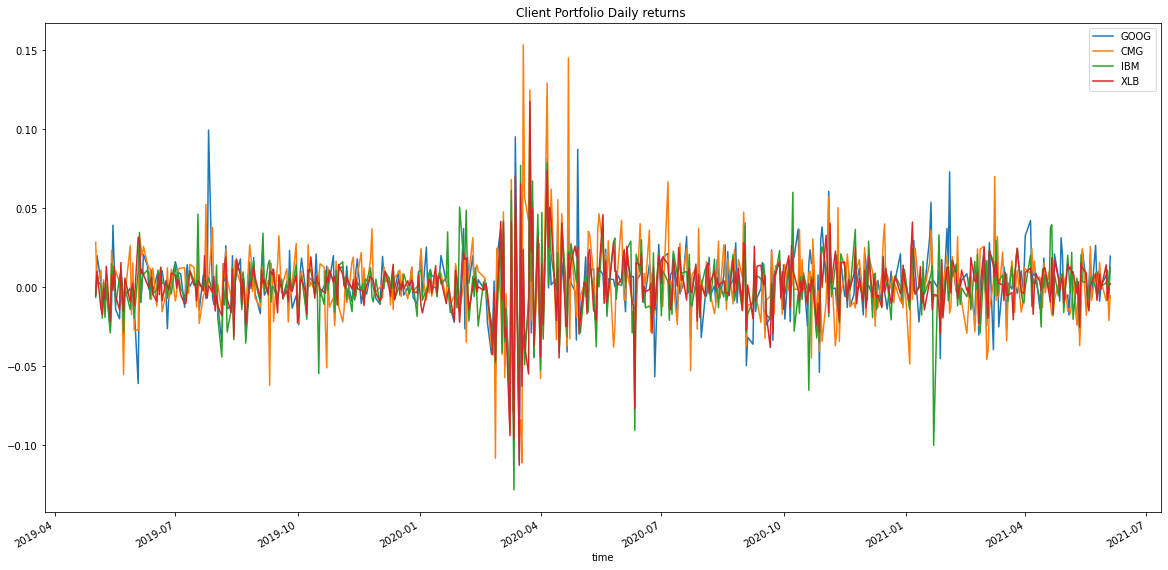

In [12]:
#using Client Portfolio Daily returns stocks plot
client_daily_returns.plot(figsize=(20,10), title= 'Client Portfolio Daily returns ')

In [13]:
# Compute the `daily_returns_df` DataFrame by chaining
# the pct_change function with the dropna function.
daily_returns = closing_prices_df.pct_change().dropna()
daily_returns.head()

GOOG       CMG       IBM       XLB       SPY  \
time                                                                          
2019-05-02 00:00:00-04:00 -0.004658  0.028355 -0.006616 -0.005318 -0.001953   
2019-05-03 00:00:00-04:00  0.019854  0.001808  0.004583  0.009980  0.009441   
2019-05-06 00:00:00-04:00  0.003332  0.010533  0.000855 -0.013940 -0.003911   
2019-05-07 00:00:00-04:00 -0.012518 -0.014386 -0.019801 -0.017717 -0.016492   
2019-05-08 00:00:00-04:00 -0.007560  0.004530  0.002761 -0.001093 -0.001666   

                                AGG  
time                                 
2019-05-02 00:00:00-04:00 -0.002076  
2019-05-03 00:00:00-04:00  0.001710  
2019-05-06 00:00:00-04:00  0.001015  
2019-05-07 00:00:00-04:00  0.001475  
2019-05-08 00:00:00-04:00 -0.000460

<AxesSubplot:title={'center':'Client Portfolio Daily returns with diversifying stocks'}, xlabel='time'>

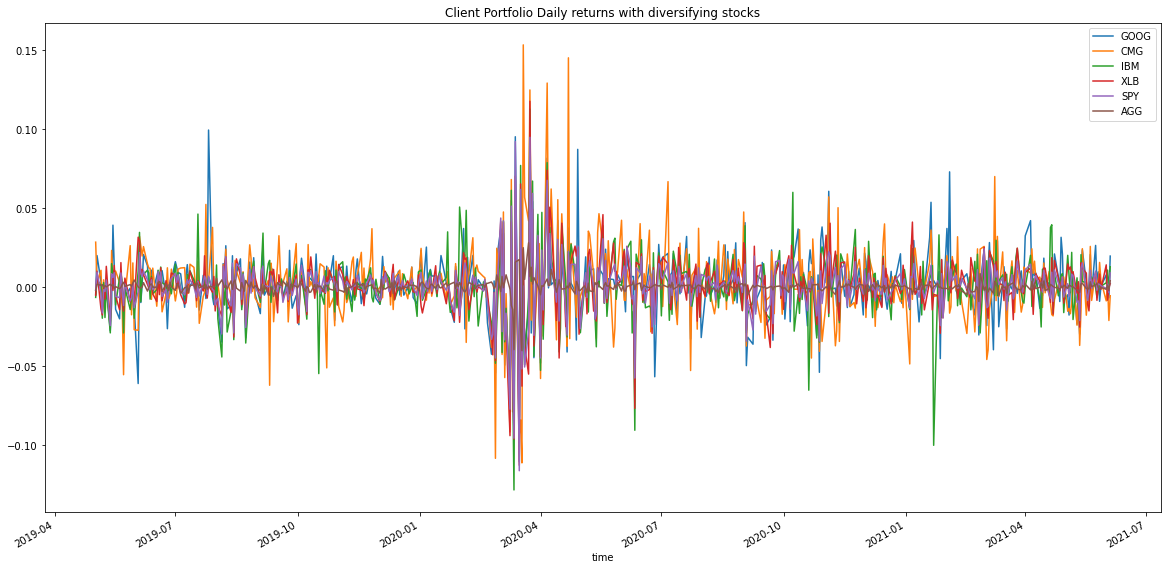

In [14]:
#using Client Portfolio Daily returns with diversifying stocks plot 
daily_returns.plot(figsize=(20,10), title= 'Client Portfolio Daily returns with diversifying stocks')

<AxesSubplot:title={'center':'Daily Retruns Histogram'}, ylabel='Frequency'>

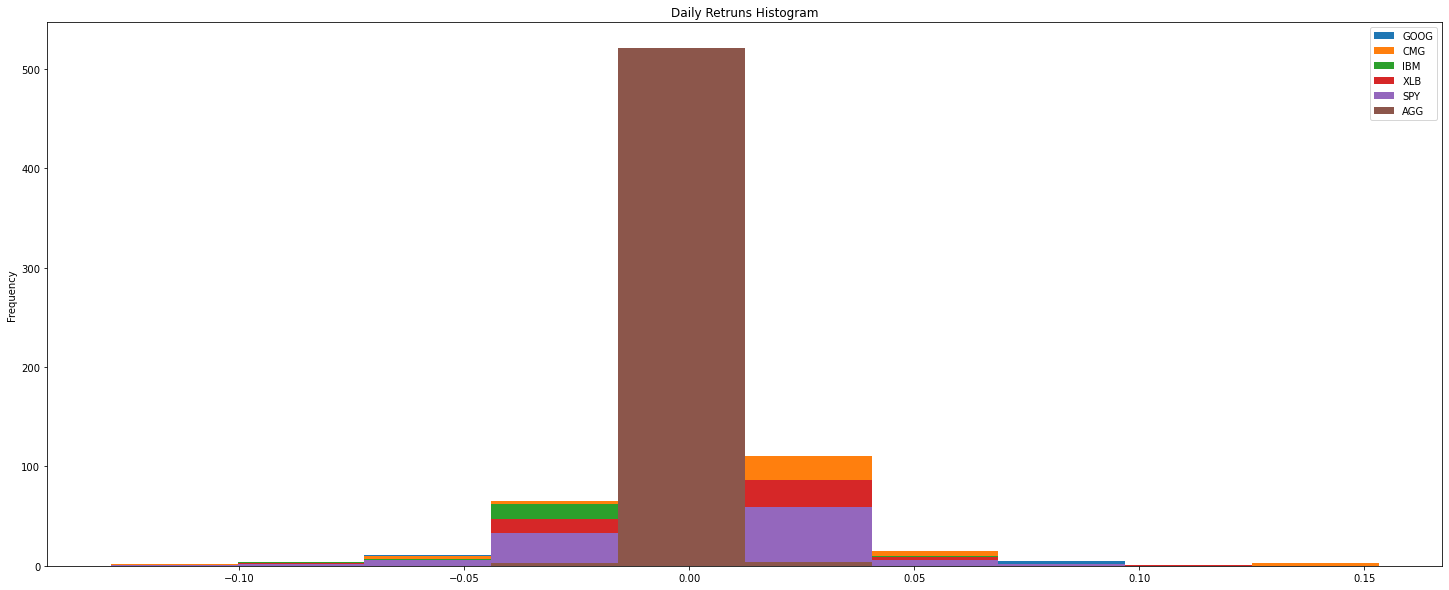

In [15]:
# Visualize distribution of daily returns percent change in closing price using a histogram plot
daily_returns.plot.hist(
    figsize=(25,10),
    title='Daily Retruns Histogram'
)

In [16]:
# Generate summary statistics for the `daily_returns_df` DataFrame
daily_returns.describe()

GOOG         CMG         IBM         XLB         SPY         AGG
count  528.000000  528.000000  528.000000  528.000000  528.000000  528.000000
mean     0.001612    0.001557    0.000303    0.001011    0.000831    0.000115
std      0.020318    0.025190    0.020565    0.018425    0.016075    0.004101
min     -0.110481   -0.111387   -0.128507   -0.112879   -0.116340   -0.040343
25%     -0.006645   -0.009723   -0.008300   -0.006585   -0.004418   -0.001107
50%      0.001807    0.001527    0.000838    0.001620    0.001521    0.000205
75%      0.011031    0.012137    0.009377    0.009544    0.007580    0.001443
max      0.099333    0.153257    0.112612    0.117540    0.094737    0.027948

<AxesSubplot:title={'center':'AGG Probability Distribution'}, ylabel='Frequency'>

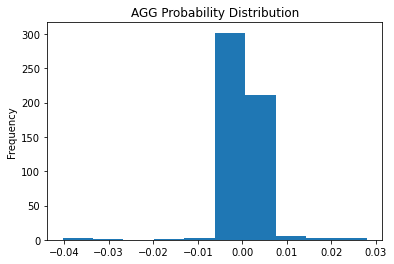

In [17]:
#Visualize distribution of iShares Core US Aggregate Bond ETF percent change in closing price using a histogram plot
daily_returns["AGG"].plot.hist(title='AGG Probability Distribution')

<AxesSubplot:title={'center':'SPY Probability Distribution'}, ylabel='Frequency'>

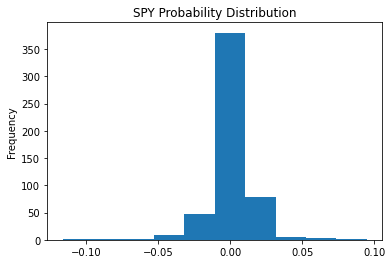

In [18]:
#Visualize distribution of SPDR S&P 500 ETF Trust percent change in closing price using a histogram plot
daily_returns["SPY"].plot.hist(title='SPY Probability Distribution')

<AxesSubplot:title={'center':'Density Plot for CMG, GOOG, IBM, XLB, AGG and SPY '}, ylabel='Density'>

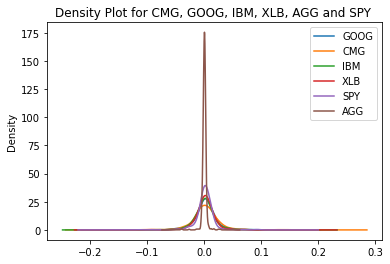

In [19]:
# Visualize the distribution of daily returns data for CMG, GOOG, IBM, XLB, AGG and SPY
# by calling the plot.density function on the daily_returns_df DataFrame.
daily_returns.plot.density(title='Density Plot for CMG, GOOG, IBM, XLB, AGG and SPY ')

In [20]:
#Using the default Pandas plot to visualize the cumulative return values for the client portfolio and diversifying stocks over time. 
#portfolio_cumulative_price = (1+portfolio_daily_returns).cumprod()-1
portfolio_cumulative_price = (1+daily_returns).cumprod()-1
portfolio_cumulative_price.head()

GOOG       CMG       IBM       XLB       SPY  \
time                                                                          
2019-05-02 00:00:00-04:00 -0.004658  0.028355 -0.006616 -0.005318 -0.001953   
2019-05-03 00:00:00-04:00  0.015104  0.030215 -0.002063  0.004609  0.007470   
2019-05-06 00:00:00-04:00  0.018486  0.041066 -0.001209 -0.009395  0.003529   
2019-05-07 00:00:00-04:00  0.005737  0.026089 -0.020986 -0.026946 -0.013021   
2019-05-08 00:00:00-04:00 -0.001867  0.030737 -0.018283 -0.028009 -0.014666   

                                AGG  
time                                 
2019-05-02 00:00:00-04:00 -0.002076  
2019-05-03 00:00:00-04:00 -0.000369  
2019-05-06 00:00:00-04:00  0.000646  
2019-05-07 00:00:00-04:00  0.002122  
2019-05-08 00:00:00-04:00  0.001661

In [21]:
#portfolio cumulative price using hvplot function
portfolio_cumulative_price.hvplot(
    figsize=(20,10),
    xlabel="Date",
    ylabel= "portfolio_cumulative_price",
    title= "Portfolio Cumulative Price"
)

:NdOverlay   [Variable]
   :Curve   [time]   (value)

### Analyze the Volatility

<AxesSubplot:title={'center':'Daily Returns client Portfolio and Diversifying stocks'}>

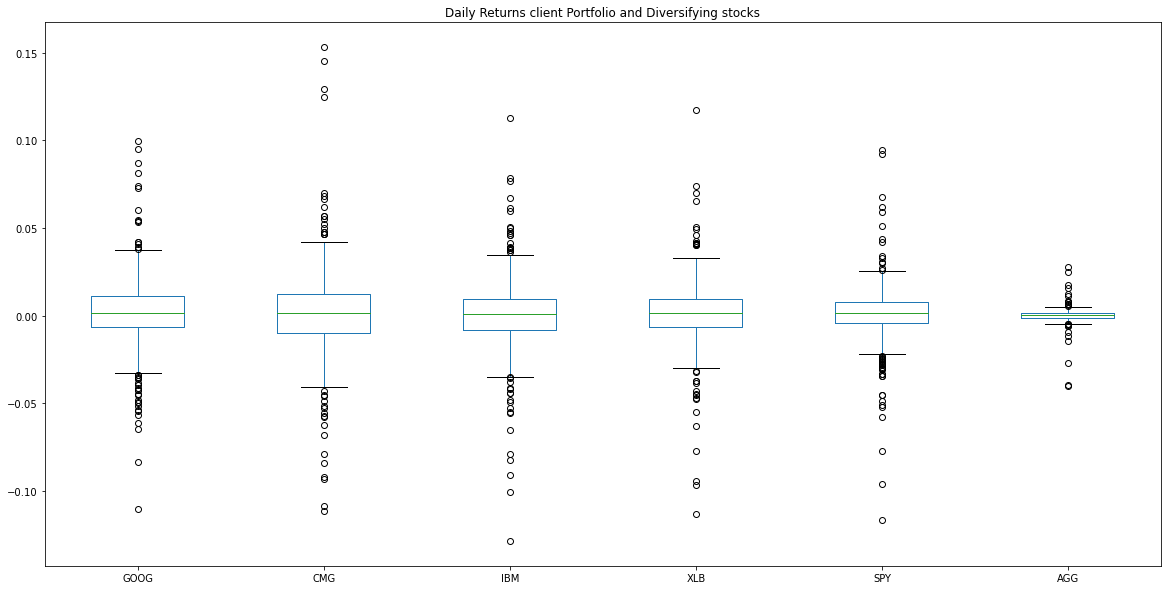

In [22]:
#Use the Pandas plot function and the kind="box" parameter to visualize the daily return data for each of the four portfolios 
daily_returns.plot(kind='box', figsize=(20,10), title= 'Daily Returns client Portfolio and Diversifying stocks')

<AxesSubplot:title={'center':'Cumulative Returns '}>

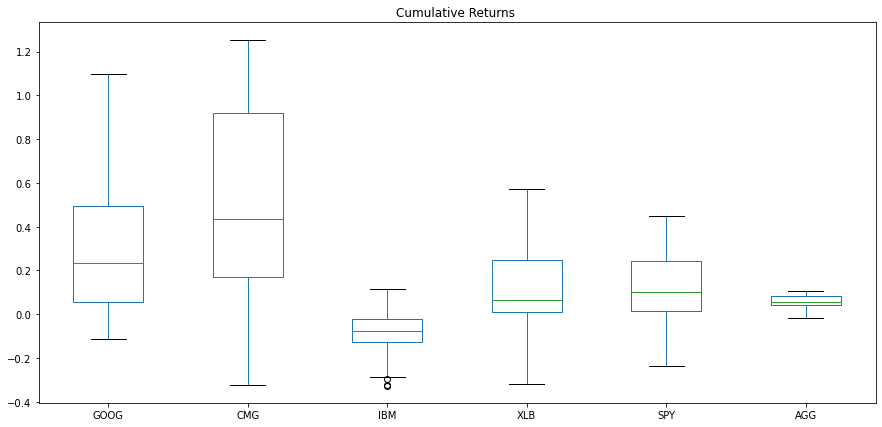

In [23]:
#Visualize the cumulative returns data for just the four fund portfolios by using another box plot.
portfolio_cumulative_price.plot(kind='box', figsize=(15,7), title= 'Cumulative Returns ')

In [74]:
#Use the Pandas std function to calculate the standard deviation for each of the portfolios with weights
standard_deviation = daily_returns.std()
standard_deviation

GOOG    0.020318
CMG     0.025190
IBM     0.020565
XLB     0.018425
SPY     0.016075
AGG     0.004101
dtype: float64

In [72]:
annualized_standard_deviation= daily_returns.std()*np.sqrt(252)*weights
annualized_standard_deviation

GOOG    0.090310
CMG     0.175949
IBM     0.000000
XLB     0.000000
SPY     0.063794
AGG     0.001953
dtype: float64

In [71]:
weights=[0.28, 0.44, 0.00, 0.00, 0.25, 0.03]
trading_days = 252
annual_average_return = daily_returns.mean()*trading_days*weights
annual_average_return

GOOG    0.113712
CMG     0.172631
IBM     0.000000
XLB     0.000000
SPY     0.052375
AGG     0.000870
dtype: float64

In [76]:
sharpe_ratios = annual_average_return/annualized_standard_deviation
sharpe_ratios.sort_values(inplace=True)
sharpe_ratios.dropna()

AGG     0.445373
SPY     0.820993
CMG     0.981142
GOOG    1.259133
dtype: float64

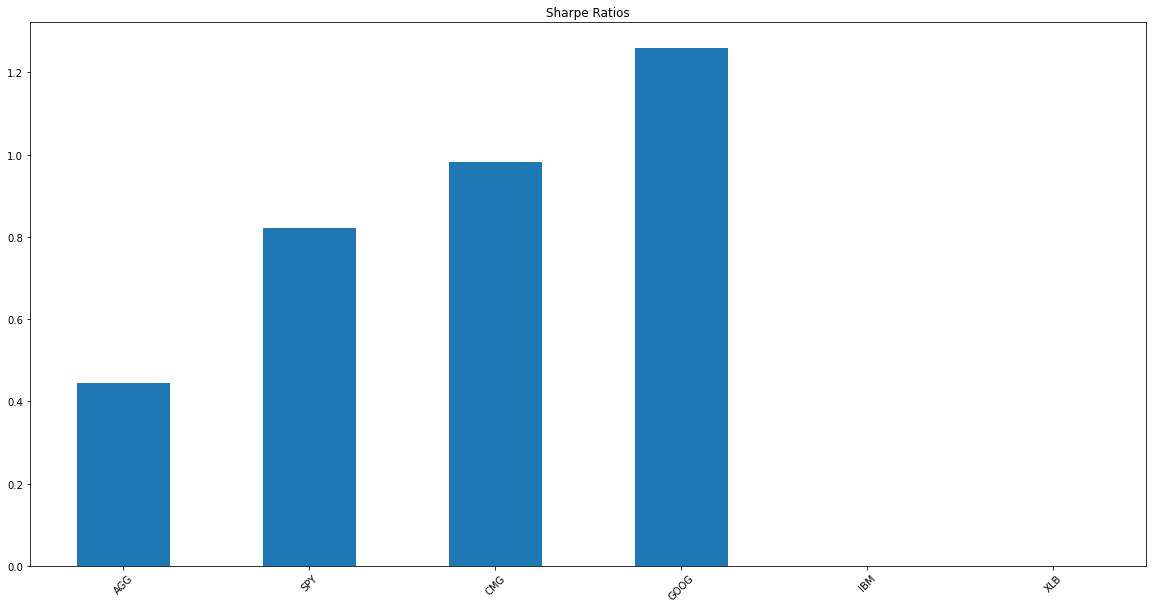

In [77]:
sharpe_ratios.plot.bar(title='Sharpe Ratios', figsize= (20,10),rot=45)
plt.show()

In [29]:
portfolio_weights= pd.DataFrame(
    {
        "ticker": ["CMG", "GOOG", "IBM", "XLB","AGG","SPY"],
        "weights": (0.28, .44, 0, 0,0.25, 0.03),
    }
)
portfolio_weights.T


0     1    2    3     4     5
ticker    CMG  GOOG  IBM  XLB   AGG   SPY
weights  0.28  0.44  0.0  0.0  0.25  0.03

<AxesSubplot:title={'center':'Tickers pie chart'}, ylabel='weights'>

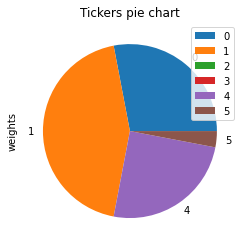

In [30]:
portfolio_weights.plot.pie(y= "weights", title= "Tickers pie chart")

In [31]:
client_portfolio_quantities=pd.DataFrame({
    "ticker": ["CMG", "GOOG", "IBM", "XLB"],
    'quantity':[10,20,500,1000],
    'type':('equity')})
display(client_portfolio_quantities)


ticker  quantity    type
0    CMG        10  equity
1   GOOG        20  equity
2    IBM       500  equity
3    XLB      1000  equity

In [32]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
cmg_shares = 10
goog_shares = 20
ibm_shares=500
xlb_shares=1000

# Access the closing price mean for client portfolio and recommend portfolio from the Alpaca DataFrame
# Converting the value to a floating point number
# Create an empty DataFrame for closing prices
portfolio_closing_prices=pd.DataFrame()
cmg_price = client_prices_df['CMG']["close"].mean()
goog_price =client_prices_df['GOOG']["close"].mean()
ibm_price =client_prices_df['IBM']["close"].mean()
xlb_price =client_prices_df['XLB']["close"].mean()
agg_price =prices_df['AGG']["close"].mean()
spy_price =prices_df['SPY']["close"].mean()
#portfolio_closing_prices=pd.concat([cmg_price, goog_price,ibm_price, xlb_price,agg_price,spy_price], axis =1)
#client_prices_df['total'] = client_prices_df['price'] * client_portfolio_quantities['quantity']
#Print(f"Total portfolio valus is {client_prices_df['total'].sum()}")

In [33]:
#closing_price_portfolio_df=pd.DataFrame()
#closing_price_portfolio_df = pd.concat([cmg_price, goog_price,ibm_price, xlb_price,agg_price,spy_price], axis =1)


In [34]:
#Total client portfolio value is multiplying each stcok price by their shares and their total sum
total_client_portfolio_value= cmg_price*cmg_shares + goog_price*goog_shares + ibm_price*ibm_shares + xlb_price*xlb_shares
print(f"total_client_portfolio_value of all shares is {total_client_portfolio_value:.2f}")

total_client_portfolio_value of all shares is 168977.08


In [56]:
#portfolio_weights
weights_1=[]
weights_2=[0.28, 0.44, 0.0, 0.0, 0.25, 0.03]
#portfolio_weights= sum(map(float,weights))
#portfolio_weights

In [57]:
#Display portfolio_weights
portfolio_weights = np.array(weights_2)
portfolio_weights

array([0.28, 0.44, 0.  , 0.  , 0.25, 0.03])

In [37]:
#portfolio_weights transposs
portfolio_weights.T

array([0.28, 0.44, 0.  , 0.  , 0.25, 0.03])

In [66]:
#calculate daily returns
daily_returns_mean=daily_returns.mean().sum()
print(f"daily returns mean is {daily_returns_mean:.4f}")

daily returns mean is 0.0054


In [39]:
#calculate expected annual return of portfolio
expected_annual_return = np.sum(daily_returns_mean * portfolio_weights) * 252
print(f'expected_annual_return is {expected_annual_return:.2f}')

expected_annual_return is 1.37


In [63]:
# Portfolio variance calc
pfolio_var = np.dot(portfolio_weights, np.dot(daily_returns.cov() * 252, portfolio_weights.T))
print(f"portfolio_variance is {pfolio_var:.2f}")

portfolio_variance is 0.08


In [43]:
def correlation(equity_list):  
    
    client_prices_df = pd. DataFrame()
    equity_columns = []
    
    # Get symbol history
    for tickers in equity_list:   
        try:
            tickers_df = get_bars(tickers)
            client_prices_df = pd.concat([client_prices_df, tickers_df], axis=1)
            equity_columns.append('close')
        except:
            print('Exception with {}'.format('close'))
            
    client_prices_df.columns['close'] = equity_columns['close']
    
    # Get correlation and sort by sum
    sum_corr = client_prices_df.corr().sum().sort_values(ascending=True).index.values
    
    return client_prices_df[sum_corr].corr()


In [54]:
sum_corr = client_prices_df.corr().sum().sort_values(ascending=True).index.values
#dispay portfolio correlation 
pfolio_corr = client_prices_df.corr()
pfolio_corr

CMG                                              GOOG  \
                 open      high       low     close    volume      open   
CMG  open    1.000000  0.999023  0.998571  0.997784 -0.337464  0.894203   
     high    0.999023  1.000000  0.998446  0.998995 -0.322429  0.892726   
     low     0.998571  0.998446  1.000000  0.998951 -0.356661  0.892319   
     close   0.997784  0.998995  0.998951  1.000000 -0.337729  0.891249   
     volume -0.337464 -0.322429 -0.356661 -0.337729  1.000000 -0.338743   
GOOG open    0.894203  0.892726  0.892319  0.891249 -0.338743  1.000000   
     high    0.895320  0.894361  0.893313  0.892933 -0.329442  0.999223   
     low     0.892399  0.891047  0.891597  0.890431 -0.347596  0.999150   
     close   0.892687  0.891737  0.891603  0.891272 -0.339410  0.998365   
     volume -0.274208 -0.262734 -0.287285 -0.272187  0.489966 -0.240250   
IBM  open   -0.198229 -0.212030 -0.185339 -0.203429 -0.289751 -0.000264   
     high   -0.213046 -0.226756 -0.201497 -0.218855 -0.273062 -0.007769   
     low    -0.177457 -0.191363 -0.163206 -0.181748 -0.323472  0.014145   
     close  -0.197493 -0.211129 -0.184242 -0.201600 -0.298313  0.003500   
     volume  0.234354  0.235319  0.224131  0.228995  0.243157  0.141124   
XLB  open    0.851305  0.845617  0.855153  0.848008 -0.443626  0.924720   
     high    0.855250  0.850050  0.858572  0.852182 -0.434005  0.930246   
     low     0.846433  0.840622  0.851228  0.843795 -0.454982  0.919859   
     close   0.850039  0.844714  0.854153  0.847856 -0.443761  0.925230   
     volume -0.159484 -0.148114 -0.180504 -0.163866  0.459426 -0.119642   

                                                          IBM            \
                 high       low     close    volume      open      high   
CMG  open    0.895320  0.892399  0.892687 -0.274208 -0.198229 -0.213046   
     high    0.894361  0.891047  0.891737 -0.262734 -0.212030 -0.226756   
     low     0.893313  0.891597  0.891603 -0.287285 -0.185339 -0.201497   
     close   0.892933  0.890431  0.891272 -0.272187 -0.203429 -0.218855   
     volume -0.329442 -0.347596 -0.339410  0.489966 -0.289751 -0.273062   
GOOG open    0.999223  0.999150  0.998365 -0.240250 -0.000264 -0.007769   
     high    1.000000  0.998893  0.999164 -0.229090 -0.012919 -0.019569   
     low     0.998893  1.000000  0.999227 -0.254954  0.010076  0.002366   
     close   0.999164  0.999227  1.000000 -0.243098 -0.002205 -0.008713   
     volume -0.229090 -0.254954 -0.243098  1.000000 -0.395149 -0.370648   
IBM  open   -0.012919  0.010076 -0.002205 -0.395149  1.000000  0.992245   
     high   -0.019569  0.002366 -0.008713 -0.370648  0.992245  1.000000   
     low     0.001566  0.026084  0.013694 -0.426404  0.993752  0.990169   
     close  -0.008154  0.015101  0.004982 -0.400224  0.986999  0.992375   
     volume  0.147771  0.133871  0.139191  0.205324 -0.272941 -0.253817   
XLB  open    0.920939  0.928006  0.923707 -0.436350  0.211852  0.197323   
     high    0.927102  0.933418  0.929660 -0.423555  0.194552  0.183263   
     low     0.915935  0.924032  0.919479 -0.450021  0.223604  0.209808   
     close   0.921987  0.929127  0.925687 -0.435252  0.206371  0.195135   
     volume -0.108122 -0.136543 -0.122922  0.599475 -0.422012 -0.389477   

                                                XLB                      \
                  low     close    volume      open      high       low   
CMG  open   -0.177457 -0.197493  0.234354  0.851305  0.855250  0.846433   
     high   -0.191363 -0.211129  0.235319  0.845617  0.850050  0.840622   
     low    -0.163206 -0.184242  0.224131  0.855153  0.858572  0.851228   
     close  -0.181748 -0.201600  0.228995  0.848008  0.852182  0.843795   
     volume -0.323472 -0.298313  0.243157 -0.443626 -0.434005 -0.454982   
GOOG open    0.014145  0.003500  0.141124  0.924720  0.930246  0.919859   
     high    0.001566 -0.008154  0.147771  0.920939  0.927102  0.915935   
     low     0.026084  0.015101  0.133871

<AxesSubplot:>

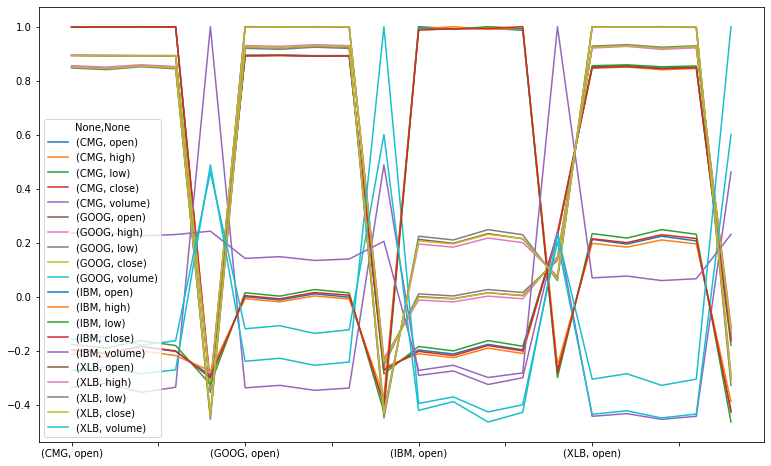

In [105]:
pfolio_corr.plot(figsize=(13, 8))


In [62]:
portfolio_volatility = np.sqrt(pfolio_var)
print(f"portfolio_volatility is {portfolio_volatility:.2f}")

portfolio_volatility is 0.28


In [68]:
#Sharpe Ratio (annual) (Assumed risk_free_rate=0)
risk_free_rate_annualized=0
sharpe_ratio = (expected_annual_return - risk_free_rate_annualized)/portfolio_volatility
sharpe_ratio

4.802210091905827